In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('final.csv')
data2=pd.read_csv('final.csv')
data2.head()

,Unnamed: 0,Passwords,length,Has_Upper,Has_Numeric,Has_SpecialChar,UpperCase_Count,LowerCase_Count,Numeric_Count,SpecialChar_Count,Alphabet_Count,Password_Source,Has_Word,Has_Name,Has_Place,Score,Password_Strength
0,0,@fl!pm0de@,10,0,1,1,0,6,1,3,6,Yahoo,0,0,0,5,Strong
1,1,pass,4,0,0,0,0,4,0,0,4,Yahoo,0,0,1,1,Weak
2,2,steveol,7,0,0,0,0,7,0,0,7,Yahoo,0,1,0,2,Weak
3,3,chotzi,6,0,0,0,0,6,0,0,6,Yahoo,0,1,0,1,Weak
4,4,lb2512,6,0,1,0,0,2,4,0,2,Yahoo,0,0,0,3,Medium


In [2]:
data3=data2.groupby('Password_Source')['Passwords'].count().reset_index()
data3

,Password_Source,Passwords
0,Hotmail,9812
1,Netflix,1832
2,Yahoo,442838


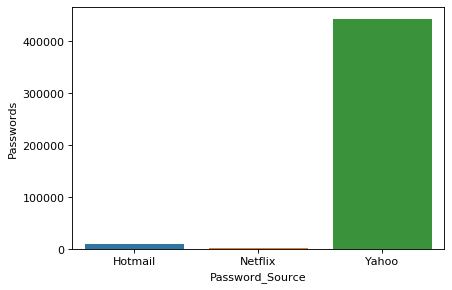

In [3]:
import seaborn as sns
plt.figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='Password_Source', y='Passwords', data=data3, estimator=np.median)
plt.show()

In [4]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
data['Passwords'] = number.fit_transform(data['Passwords'].astype('str'))



In [5]:
X=data.drop(['Password_Source','Password_Strength','Unnamed: 0',],axis=1)

Y=data.Password_Source

### Oversampling

In [6]:
from imblearn.over_sampling import SMOTE
X, Y = SMOTE().fit_sample(X, Y)

In [7]:
X1=pd.DataFrame(data=X,columns=['Passwords','length','Has_Upper','Has_Numeric','Has_SpecialChar','UpperCase_Count','LowerCase_Count','Numeric_Count','SpecialChar_Count','Alphabet_Count','Has_Word','Has_Word','Has_Name','Has_Place']) 
Y1=pd.DataFrame(data=Y,columns=['Password_Source'])
X1['Password_Source']=Y1['Password_Source']
X1.head()

,Passwords,length,Has_Upper,Has_Numeric,Has_SpecialChar,UpperCase_Count,LowerCase_Count,Numeric_Count,SpecialChar_Count,Alphabet_Count,Has_Word,Has_Word,Has_Name,Has_Place,Password_Source
0,55079,10,0,1,1,0,6,1,3,6,0,0,0,0,Yahoo
1,266924,4,0,0,0,0,4,0,0,4,0,0,0,1,Yahoo
2,312400,7,0,0,0,0,7,0,0,7,0,0,1,0,Yahoo
3,129370,6,0,0,0,0,6,0,0,6,0,0,1,0,Yahoo
4,219732,6,0,1,0,0,2,4,0,2,0,0,0,0,Yahoo


In [8]:
X4=X1.groupby('Password_Source')['Passwords'].count().reset_index()
X4

,Password_Source,Passwords
0,Hotmail,442838
1,Netflix,442838
2,Yahoo,442838


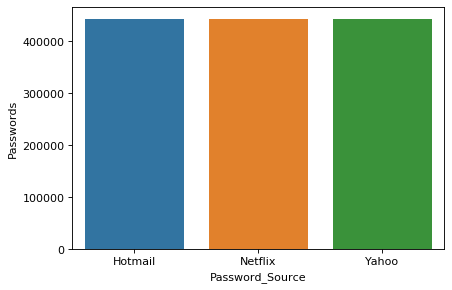

In [9]:
import seaborn as sns
plt.figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='Password_Source', y='Passwords', data=X4, estimator=np.median)
plt.show()

In [10]:
#Splitting the dataset in to training and testing
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)

### Randomised search CV

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf_0 = RandomForestClassifier(random_state = 8)
print('Parameters currently in use:\n')
print(rf_0.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 8, 'verbose': 0, 'warm_start': False}


In [12]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

max_features = ['auto', 'sqrt','log2']

max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [20, 40, 60, 80, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# creating the base model to tune
rfc = RandomForestClassifier(random_state=8)
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)
# Fit the random search model
random_search.fit(xtrain, ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

In [ ]:
print(xtrain.shape, xtest.shape)

### Without tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10)
rf1 = RandomForestClassifier(max_depth=30)
rf1.fit(xtrain, ytrain)
rf.fit(xtrain, ytrain)

### GridSearch

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
bootstrap = [False]
max_depth = [30, 40, 50]
max_features = ['sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [5, 10, 15]
n_estimators = [800]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}


rfc = RandomForestClassifier(random_state=8)


cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Create the grid search model
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search 
grid_search.fit(xtrain,ytrain)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy for random forest with max depth 20: ', 100 * accuracy_score(ytest, rf1.predict(xtest)), '%')
print('Accuracy for random with max depth 10: ', 100 * accuracy_score(ytest, rf.predict(xtest)), '%')
print('Accuracy for random forest with random search hyper parameters: ', 100 * accuracy_score(ytest, random_search.predict(xtest)), '%')
print('Accuracy for random forest with gris search hyper parameters: ', 100 * accuracy_score(ytest, grid_search.predict(xtest)), '%')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

### Classification repot for random forest with max depth 10

In [ ]:
print("Classification report for max depth 10")
print(classification_report(ytest, rf.predict(xtest)))

In [ ]:
results = confusion_matrix(ytest, rf.predict(xtest))
print(results)

### confusion matrix with maxdepth 10

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(results,annot=True)
plt.xlabel('Predicted')
plt.xlabel('truth')

### Classificatio report for random forest with max depth 20

In [ ]:
print("Classification report for max depth 20")
print(classification_report(ytest, rf1.predict(xtest)))

In [ ]:
results = confusion_matrix(ytest, rf1.predict(xtest))
print(results)

### confusion matrix with maxdepth 20

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(results,annot=True)
plt.xlabel('Predicted')
plt.xlabel('truth')

### Classification report using randomised search

In [ ]:
print("Classification report using randomised search")
print(classification_report(ytest, random_search.predict(xtest)))

In [ ]:
results = confusion_matrix(ytest, random_search.predict(xtest))
print(results)

### Confusion matrix using randomised search parameters

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(results,annot=True)
plt.xlabel('Predicted')
plt.xlabel('truth')

### Classification report using grid search

In [ ]:
print("Classification report using grid search")
print(classification_report(ytest, grid_search.predict(xtest)))

### Confusion matrix using randomised search parameters

In [ ]:
results = confusion_matrix(ytest, grid_search.predict(xtest))
print(results)